# Assignment X: Topic Modeling Dcard Lyrics

## Import necessary dependencies and settings

In [25]:
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import nltk, random
from nltk.corpus import movie_reviews
from nltk.stem import PorterStemmer

pd.options.display.max_colwidth = 200
%matplotlib inline

## Sample corpus of text documents

### Jay Songs

In [3]:
import pickle
with open('jay_seg.pickle', 'rb') as f:
    jay_seg = pickle.load(f)

In [4]:
corpus_df =pd.read_csv('../../../RepositoryData/data/data-chinese-songs-jaychou.csv')

In [5]:
corpus_df.head()

,title,lyric
0,我是如此相信,鳥群離開了森林 整座天空很灰心\n蝴蝶不再被吸引 玫瑰盛開的很安靜\n遠方的風雨不停 城市蒼白而孤寂\n徘徊無助的人群 焦慮著何時放晴\n故事裡能毀壞的只有風景\n誰也摧毀不了我們的夢境\n弦月旁的流星劃過了天際\n我許下的願望該向誰去說明\n隕石在浩瀚的宇宙間旅行\n璀璨的夜空裡漫天的水晶\n我的禱告終於有了回音\n我是如此相信 在背後支撐的是你\n一直與我並肩而行 仰望等太陽升起\n聽...
1,英雄,人生不是ㄧ個人的遊戲\nㄧ起奮鬥ㄧ起超越ㄧ起殺吧sup兄弟\n好戰好勝戰勝逆命\n管他天賦夠不夠我們都還需要再努力\n你的劍就是我的劍\n艾希的箭可不可以準ㄧ點 嘿\n你打野我來控兵線\n不要隨便慌張就交閃現\n旋轉跳躍你閉著眼\n卡特轉完會讓你閉上眼\n悟空蓋倫也轉圈圈\n盲僧李先生ㄧ腳把你 踢回老家\n擊殺 雙殺 三殺 Penta kill\n扛塔 偷拆 插眼讓我傳送\n...
2,雙截棍,岩燒店的煙味瀰漫 隔壁是國術館\n店裡面的媽媽桑 茶道 有三段\n教拳腳武術的老板 練鐵沙掌 耍楊家槍\n硬底子功夫最擅長 還會金鐘罩鐵布衫\n他們兒子我習慣 從小就耳濡目染\n什麼刀槍跟棍棒 我都耍的有模有樣\n什麼兵器最喜歡 雙截棍柔中帶剛\n想要去河南嵩山 學少林跟武當\n幹什麼(客) 幹什麼(客) 呼吸吐納心自在\n幹什麼(客) 幹什麼(客) 氣沉丹田手...
3,開不了口,才離開沒多久就開始 擔心今天的妳過得好不好\n整個畫面是妳 想妳想的睡不著\n嘴嘟嘟那可愛的模樣 還有在妳身上香香的味道\n我的快樂是妳 想妳想的都會笑\n沒有妳在我有多難熬(沒有妳在我有多難熬多煩惱)\n沒有妳煩我有多煩惱(沒有妳煩我有多煩惱多難熬)\n穿過雲層 我試著努力向妳奔跑\n愛才送到 妳卻已在別人懷抱\n就是開不了口 讓她知道\n我一定會呵護著妳 也逗妳笑\n妳...
4,床邊故事,從前從前有隻貓頭鷹 牠站在屋頂\n屋頂後面一遍森林 森林很安靜\n安靜的鋼琴在大廳 閣樓裡 仔細聽\n仔細聽 叮叮叮 什麼聲音\n乖乖睡 不要怕 聽我說\n乖乖睡 醒來就 吃蘋果\n不睡覺 的時候 有傳說\n會有人 咬你的 小指頭\n這故事 繼續翻頁 再翻頁\n你繼續 不想睡 我卻想睡\n然後我準備 去打開衣櫃\n去看看 躲著誰 去看看 躲著誰\...


In [6]:
norm_corpus = [' '.join([w for w,p in d if p in ['Na','VC']]) for d in jay_seg]

In [7]:
norm_corpus[0]

'鳥群 離開 森林 灰心 蝴蝶 玫瑰 風雨 人群 故事 毀壞 風景 摧毀不了 夢境 弦月 流星 劃過 許下 願望 隕石 宇宙 水晶 回音 支撐 仰望 太陽 鳥群 聲音 守候 人 信心 雙手 彈奏 出 鳥群 離開 森林 蝴蝶 玫瑰 風雨 人群 故事 毀壞 風景 摧毀不了 夢境 弦月 流星 許下 願望 隕石 宇宙 水晶 回音 支撐 仰望 等 太陽 鳥群 聲音 守候 人 信心 雙手 彈奏 出 支撐 仰望 等 太陽 鳥群 聲音 守候 人 信心 雙手 彈奏出'

## Bag of Words Model

- Bag-of-words model is the simplest way to vectorize texts into numeric representations.
- In short, it is a method to represent a text using its word frequency list.
- The sequential order of words in the text is therefore naively ignored.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=2, max_df=1.0,token_pattern=r'[^\s0-9]+')
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<212x1353 sparse matrix of type '<class 'numpy.int64'>'
	with 6039 stored elements in Compressed Sparse Row format>

In [9]:
# view dense representation 
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
# get all unique words in the corpus
vocab = np.array(cv.get_feature_names())
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,..,...,一,一生,一統,上,上帝,下,世事,世人,...,默,默劇,默契,默片,點,點亮,點心,鼻子,龍,龍捲風
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Latent Dirichlet Allocation

In [11]:
num_of_topic = 4

In [12]:
%%time
from sklearn.decomposition import LatentDirichletAllocation


lda = LatentDirichletAllocation(n_components=num_of_topic, max_iter=1000, random_state=0,
                               max_doc_update_iter=50, learning_method='online',
                               batch_size=50, learning_offset = 50, n_jobs = -1)
dt_matrix = lda.fit_transform(cv_matrix) # document matrix

CPU times: user 27.9 s, sys: 2.64 s, total: 30.5 s
Wall time: 1min 13s


In [13]:
features = pd.DataFrame(dt_matrix, columns = ["T"+str(n) for n in range(1,num_of_topic+1)])
features

,T1,T2,T3,T4
0,0.987465,0.004468,0.004003,0.004064
1,0.982056,0.005835,0.006157,0.005952
2,0.005601,0.005334,0.983399,0.005666
3,0.971742,0.009187,0.009223,0.009847
4,0.991628,0.002718,0.002833,0.002821
...,...,...,...,...
207,0.977596,0.007525,0.007424,0.007456
208,0.979522,0.006796,0.006811,0.006870
209,0.008353,0.008119,0.975310,0.008217
210,0.988824,0.003722,0.003705,0.003749


## Show topics and their weights

In [14]:
# tt_matrix = lda.components_ # topic matrix
# for topic_weights in tt_matrix:
#     topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
#     topic = sorted(topic, key=lambda x: -x[1])
#     topic = [item for item in topic if item[1] > 0.6]
#     print(topic)
#     print()


In [16]:
topic_terms = lda.components_
top_terms = 20
topic_keywords_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:,:top_terms]
topic_keywords = vocab[topic_keywords_idxs]
topics = [', '.join(w) for w in topic_keywords]
pd.set_option('display.max_colwidth', None)
topics_df = pd.DataFrame(topics,
                        columns = ['Keywords per Topic'],
                        index = ["Topic"+str(n) for n in range(1,num_of_topic+1)])

In [18]:
topics_df

,Keywords per Topic
Topic1,"看, 手, 夢, 人, 牽, 心, 時間, 找, 故事, 唱, 陪, 臉, 風, 歌, 放, 帶, 離開, 話, 淚, 女人"
Topic2,"咪, 茶, 泡, 愛情, 爺爺, 嘴, 寫, 彈奏, 風, 爸爸, 味道, 哥哥, 麥, 眼睛, 事, 風沙, 氣, 水, 唇印, 夜曲"
Topic3,"打, 媽媽, 人, 看, 龍, 功夫, 吃, 寫, 雙截棍, 鈴, 話, 使用, 爸爸, 媽, 做, 畫面, 冰淇淋, 暴力, 拿, 拳"
Topic4,"人, 離開, 愛情, 等, 雨, 開, 愛, 眼淚, 娘子, 解, 黑色, 風, 歌詞, 一生, 花, 嚐, 耍, 遇見, 心, 寫"


In [19]:
pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_colwidth', 200)


dt_df = pd.DataFrame(dt_matrix,
                    columns=["Topic"+str(n) for n in range(1,num_of_topic+1)])

max_contrib_topics = dt_df.max(axis=0)
dominant_topics = max_contrib_topics.index
contrib_perc = max_contrib_topics.values
document_numbers = [dt_df[dt_df[t]==max_contrib_topics.loc[t]].index[0]
                    for t in dominant_topics]
documents = [norm_corpus[i] for i in document_numbers]

documents_df = pd.DataFrame({'Dominant Topic': dominant_topics,
                            'Contribution%': contrib_perc,
                            'DOCID': document_numbers,
                            'Topic': topics_df['Keywords per Topic'],
                            'Text': documents})

In [20]:
documents_df

,Dominant Topic,Contribution%,DOCID,Topic,Text
Topic1,Topic1,0.99511,111,"看, 手, 夢, 人, 牽, 心, 時間, 找, 故事, 唱, 陪, 臉, 風, 歌, 放, 帶, 離開, 話, 淚, 女人",望 星星 望 星星 望 星星 望 星 乘 風 雲 形狀 風 吃掉 載 載 陽光 蝴蝶 花 佈滿 夕陽 你我 迎 風 手 牽 手 望 天 看 星星 線 背對背 許下 心願 看 星 手 牽 手 望 天 看 星星 連成 線 背對背 許下 心願 看 星 實現 朋友 歌聲 手 手 歌曲 燈 時間 分寸 輕重 分 支撐 看 身影 黑暗 夢 空間 抱 臉 看 看 夢 畫面 故事 離 時間 抱 挽留 燈...
Topic2,Topic2,0.99295,120,"咪, 茶, 泡, 愛情, 爺爺, 嘴, 寫, 彈奏, 風, 爸爸, 味道, 哥哥, 麥, 眼睛, 事, 風沙, 氣, 水, 唇印, 夜曲",爺爺 泡 茶 味道 泡 茶 名 利 拿 爺爺 泡 茶 味道 爺爺 泡 茶 口感 味覺 陸羽 泡 茶 山水畫 山泉 地表 臉 泉水 礦層巖 爺爺 栽種 樟木 樹苗 躲 屋簷 爺爺 抽 煙 陸羽 寫 茶經 翻閱 字典 字眼 事 海角 時間 茶桌 樟木 年輪 鏡頭 臉 年 爺爺 手繭 泡 水 茶色 爺爺 泡 茶 味道 家 挑剔 口感 味覺 陸羽 泡 茶 名 利 拿 牽 馬 爺爺 泡 茶 味...
Topic3,Topic3,0.99474,194,"打, 媽媽, 人, 看, 龍, 功夫, 吃, 寫, 雙截棍, 鈴, 話, 使用, 爸爸, 媽, 做, 畫面, 冰淇淋, 暴力, 拿, 拳",等 寫完 詞 出 專輯 歌 時期 梯田 看過 綠地 攝影 畫面 寫 詞 詩人 公車 看 窗 牛 啃 草 自由自在 那魯灣 牛兒 水溝 流 夢 收割期 人們 汗水 畫面 作品 油畫 拿到 獎狀 用 哼 撕掉 換回 自然 梯田 看 西洋片 水牛 畫 掛 牆壁 人們 蒸蒸日上 遊客 看看 窗 景點 牛兒 那魯灣 利用 利用 人類 破壞 自然 生態 藝術 砍下 樹 醬 裝飾 事 相機 紀錄 ...
Topic4,Topic4,0.99521,186,"人, 離開, 愛情, 等, 雨, 開, 愛, 眼淚, 娘子, 解, 黑色, 風, 歌詞, 一生, 花, 嚐, 耍, 遇見, 心, 寫",前奏 巷 章 推向 接近 事實 石楠 煙斗 霧 樹 圓形 盔甲 騎士 臂 徽章 人 馬車 聲響 拜訪 月光 血色 手槍 手杖 蠟像 珠寶箱 符號 假象 堆砌 證據 埋葬 嘲弄 樂章 正義 終場 寫上 點亮 灰燼 微光 晨曦 光 風乾 雨滴 清洗 牆 黑色 墨 關上 布幕 間奏 事實 穿 腳印 土壤 花香 服裝 人 理由 戴 面具 動機 名字 欲望 人性 沼澤 弄髒 真相 鐵床 圖 拼...


In [26]:
import pyLDAvis
import pyLDAvis.sklearn
import dill

pyLDAvis.enable_notebook()
cv_matrix2 = np.matrix(cv_matrix)
pyLDAvis.sklearn.prepare(lda, cv_matrix2, cv, mds="mmds")

PreparedData(topic_coordinates=             x        y  topics  cluster     Freq
topic                                            
0     -0.15138 -0.09396       1        1 48.78087
3     -0.10175  0.17681       2        1 25.56927
2      0.13958 -0.16868       3        1 19.62788
1      0.11356  0.08584       4        1  6.02198, topic_info=     Term     Freq     Total Category  logprob  loglift
431     打 53.00000  53.00000  Default 30.00000 30.00000
286    媽媽 51.00000  51.00000  Default 29.00000 29.00000
404    愛情 66.00000  66.00000  Default 28.00000 28.00000
177     咪 23.00000  23.00000  Default 27.00000 27.00000
1244   離開 89.00000  89.00000  Default 26.00000 26.00000
...   ...      ...       ...      ...      ...      ...
804    玫瑰  3.42769   9.70970   Topic4 -5.23130  1.76850
1292   風景  3.32515  19.00576   Topic4 -5.26170  1.06650
475     拿  3.38738  24.86738   Topic4 -5.24310  0.81630
856     看  3.78418 141.80280   Topic4 -5.13240 -0.81390
421     手  3.65205 116.05410   Topic4 -5.16790 -0.64900

[247 rows x 6 columns], token_table=      Topic    Freq Term
term                    
3         2 0.94277   一生
17        1 0.73799    事
17        2 0.09522    事
17        3 0.04761    事
17        4 0.11903    事
...     ...     ...  ...
1342      2 0.84973   黑色
1342      3 0.05311   黑色
1342      4 0.05311   黑色
1351      3 0.97291    龍
1352      2 0.97294  龍捲風

[320 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

## Clustering documents using topic model features

In [27]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=num_of_topic, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,title,lyric,ClusterLabel
0,我是如此相信,鳥群離開了森林 整座天空很灰心\n蝴蝶不再被吸引 玫瑰盛開的很安靜\n遠方的風雨不停 城市蒼白而孤寂\n徘徊無助的人群 焦慮著何時放晴\n故事裡能毀壞的只有風景\n誰也摧毀不了我們的夢境\n弦月旁的流星劃過了天際\n我許下的願望該向誰去說明\n隕石在浩瀚的宇宙間旅行\n璀璨的夜空裡漫天的水晶\n我的禱告終於有了回音\n我是如此相信 在背後支撐的是你\n一直與我並肩而行 仰望等太陽升起\n聽...,0
1,英雄,人生不是ㄧ個人的遊戲\nㄧ起奮鬥ㄧ起超越ㄧ起殺吧sup兄弟\n好戰好勝戰勝逆命\n管他天賦夠不夠我們都還需要再努力\n你的劍就是我的劍\n艾希的箭可不可以準ㄧ點 嘿\n你打野我來控兵線\n不要隨便慌張就交閃現\n旋轉跳躍你閉著眼\n卡特轉完會讓你閉上眼\n悟空蓋倫也轉圈圈\n盲僧李先生ㄧ腳把你 踢回老家\n擊殺 雙殺 三殺 Penta kill\n扛塔 偷拆 插眼讓我傳送\n...,0
2,雙截棍,岩燒店的煙味瀰漫 隔壁是國術館\n店裡面的媽媽桑 茶道 有三段\n教拳腳武術的老板 練鐵沙掌 耍楊家槍\n硬底子功夫最擅長 還會金鐘罩鐵布衫\n他們兒子我習慣 從小就耳濡目染\n什麼刀槍跟棍棒 我都耍的有模有樣\n什麼兵器最喜歡 雙截棍柔中帶剛\n想要去河南嵩山 學少林跟武當\n幹什麼(客) 幹什麼(客) 呼吸吐納心自在\n幹什麼(客) 幹什麼(客) 氣沉丹田手...,2
3,開不了口,才離開沒多久就開始 擔心今天的妳過得好不好\n整個畫面是妳 想妳想的睡不著\n嘴嘟嘟那可愛的模樣 還有在妳身上香香的味道\n我的快樂是妳 想妳想的都會笑\n沒有妳在我有多難熬(沒有妳在我有多難熬多煩惱)\n沒有妳煩我有多煩惱(沒有妳煩我有多煩惱多難熬)\n穿過雲層 我試著努力向妳奔跑\n愛才送到 妳卻已在別人懷抱\n就是開不了口 讓她知道\n我一定會呵護著妳 也逗妳笑\n妳...,0
4,床邊故事,從前從前有隻貓頭鷹 牠站在屋頂\n屋頂後面一遍森林 森林很安靜\n安靜的鋼琴在大廳 閣樓裡 仔細聽\n仔細聽 叮叮叮 什麼聲音\n乖乖睡 不要怕 聽我說\n乖乖睡 醒來就 吃蘋果\n不睡覺 的時候 有傳說\n會有人 咬你的 小指頭\n這故事 繼續翻頁 再翻頁\n你繼續 不想睡 我卻想睡\n然後我準備 去打開衣櫃\n去看看 躲著誰 去看看 躲著誰\...,0
...,...,...,...
207,大頭貼,Ya 這首歌 送給我的朋友 詹宇豪\n真的有夠衰(台語) 不是別人拍到他\n哼 自己拍到自己 Ya 聽下去(台語)\n前幾天從香港回來 聽到狗週刊\n拍了宇豪跟Lara 場面有點溫馨 有點甜蜜\n有什麼不可以 照片不腥羶色 嘴對嘴\n年輕人都試過戀愛 怎麼不可以嘴對嘴\n我說真心話大冒險遊戲 遊戲就是這樣玩\n真心話大冒險遊戲 還有更誇張更恐怖的\n只是你們沒有機會看到啊 張傑說他把過８個...,0
208,不知不覺愛上你,不知不覺愛上你\n我不知不覺愛上你 就像呼吸\n明明現在的你正躺我懷裡\n還是懷疑總覺得不夠力\n要怎樣才抱得更緊\nSHOO BE DOO SHOO BE DOO\n可以倒流讓我陪你一起\n早聽說孩提時的你愛讓我哄你\n好羨慕和你同班同桌男生\n多麼幸運\n讓我可以代替你最愛的那個木偶玩具\nWOOH\n我不知不覺愛上你就像呼吸\n明明現在的你正躺(在)我(的)懷裡\n還是懷疑總覺得不夠...,0
209,熊貓人,2030年光明市 沐浴陽光\n誰懶在床上 翻閱著 科幻偶像\n這一頁寫到一座廢舊工廠\n超喜歡這感覺的未來式的家當\n廚房里煮著濃郁的竹筍湯\n鋼琴彈唱悠揚飄出了琴房\n誰在做拯救世界的夢想\n這城市安全籠罩在不祥\n紅色圍巾飄飄 穿上熊貓外套\n伸張正義的火苗 體內熊熊燃燒\n輕輕舒展拳腳 畫面變得潦草\n邪惡勢力哪里逃 東方功夫討教\n紅色圍巾飄飄 熊貓超人來到\n雙截棍不是花招 你像...,2
210,哇靠,哇靠著田邊的風車唱著小時候的歌\n關於折疊好的夢想該染上什麼顏色\n才更適合 在蒲公英成熟的季節飛呢\n不熟悉的土地 長出的蘆葦\n在冬季會不會還很美麗\n我們都在努力尋找屬於自己的土地\n被雨淋濕的日記 抓秋蟬劃傷的幼稚\n如果我們現在能笑的很快樂的事\n還是鞦韆和夕陽下追趕的燕子\n為什麼要親自把美好都留在過去\n就笑一個吧\n想看海就丟下遺憾揚起帆\n有些畫面不是靠焦距就能瀏覽\n想...,0


## Visualize topic distributions

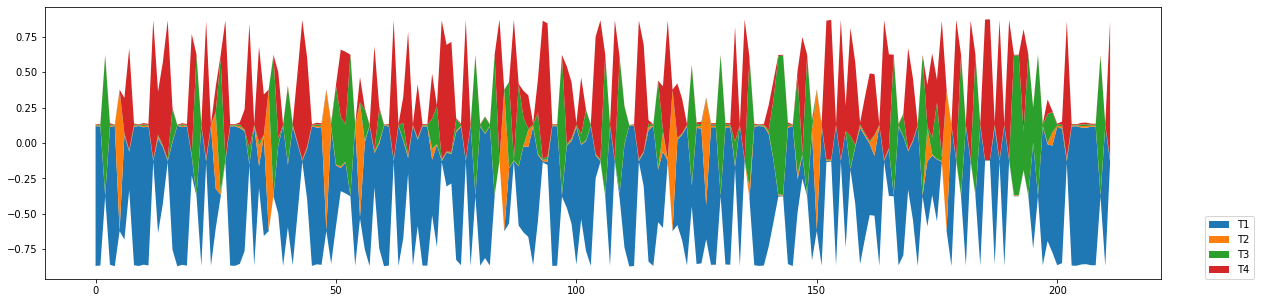

In [29]:
x_axis = corpus_df.index
y_axis = features

fig, ax = plt.subplots(figsize=(20,5))

# Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(x_axis, y_axis.T, baseline='wiggle', labels=y_axis.columns)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

In [31]:
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
# lda_model - LatentDirichletAllocation()
# vect - CountVectorizer()
# texts - the list of tokenized words
norm_corpus
norm_corpus_tokens = [doc.split() for doc in norm_corpus]


metric_coherence_gensim(measure='c_v', 
                        top_n=10, 
                        topic_word_distrib= lda.components_, 
                        dtm=cv.fit_transform(norm_corpus), 
                        vocab=np.array(cv.get_feature_names()), 
                        texts=norm_corpus_tokens)

[0.4624846092264191,
 0.389057595015177,
 0.35260753929261884,
 0.44817352289651746]